In [5]:

%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn


Davies-Bouldin Index: 0.7951610834130648


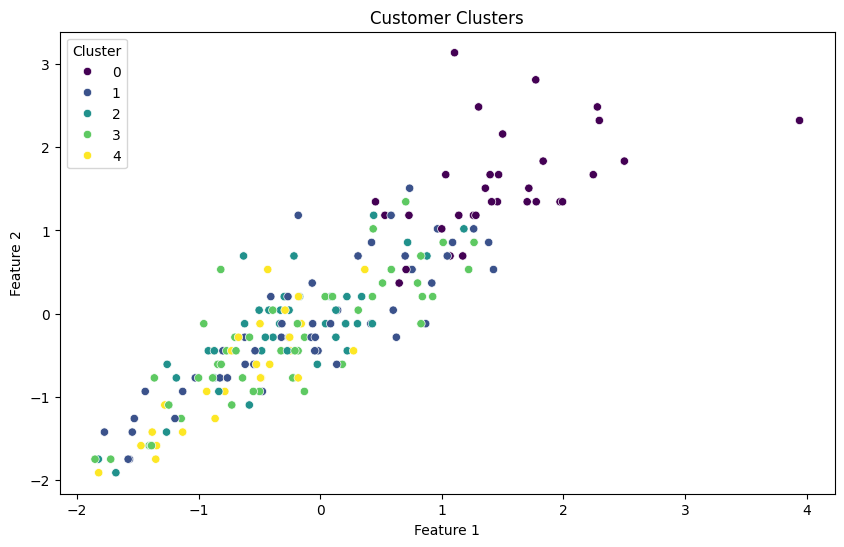

Customer cluster assignments saved to Customer_Clusters.csv


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets for clustering
merged_data = transactions.merge(customers, on="CustomerID", how="left")

# Aggregate transaction data by customer
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "Region": lambda x: x.mode()[0]  # Most common region
}).reset_index()

# One-hot encode categorical variables
customer_features_encoded = pd.get_dummies(customer_features, columns=["Region"], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features_encoded.drop("CustomerID", axis=1))

# Perform clustering using KMeans
num_clusters = 5  # You can experiment with values between 2 and 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)

# Assign cluster labels
customer_features["Cluster"] = kmeans.labels_

# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=kmeans.labels_,
    palette="viridis",
    legend="full"
)
plt.title("Customer Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

# Save cluster assignments to a CSV file
customer_features.to_csv("Customer_Clusters.csv", index=False)
print("Customer cluster assignments saved to Customer_Clusters.csv")

